In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset from Google Colab's file system
file_path = '/content/creditcard.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

<ipython-input-4-0e89f0a13b41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


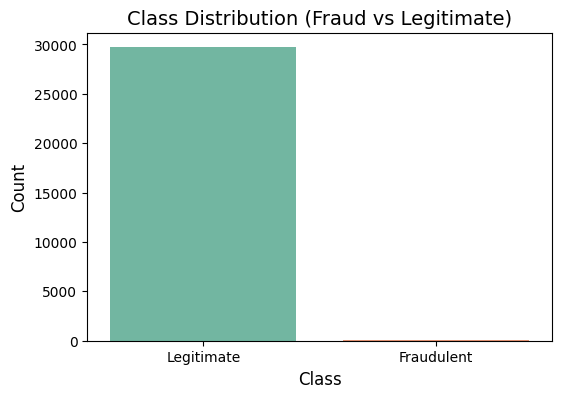

In [4]:
# Visualize the class distribution (fraud vs legitimate)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title('Class Distribution (Fraud vs Legitimate)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()


In [5]:
# Check class distribution to see the imbalance
print("\nClass distribution (percentage of fraud and legit transactions):")
print(data['Class'].value_counts(normalize=True))



Class distribution (percentage of fraud and legit transactions):
Class
0.0    0.996845
1.0    0.003155
Name: proportion, dtype: float64


In [6]:
# Features and target
X = data.drop(columns='Class')  # Features
y = data['Class']  # Target

# Scale 'Time' and 'Amount' columns using StandardScaler
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Display first 5 rows of scaled features
print("\nAfter scaling, the first 5 rows of the features are:")
print(X.head())



After scaling, the first 5 rows of the features are:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.778936 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.778936  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.778853 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.778853 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.778770 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24   

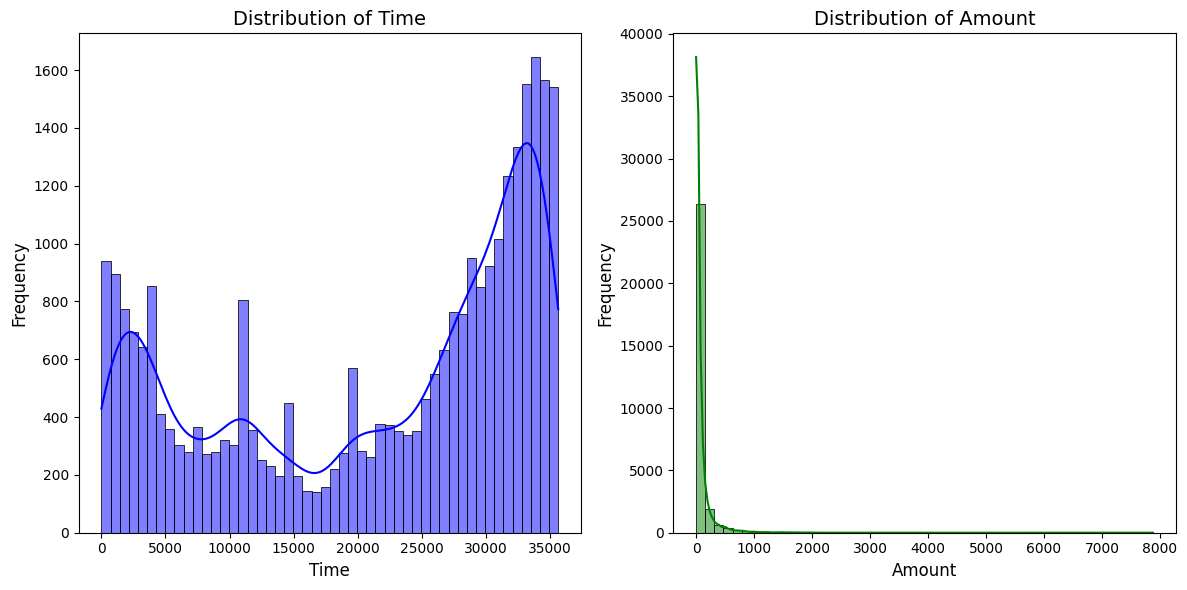

In [7]:
# Visualize the distribution of 'Time' and 'Amount' features
plt.figure(figsize=(12, 6))

# Distribution of 'Time' feature
plt.subplot(1, 2, 1)
sns.histplot(data['Time'], kde=True, color='blue', bins=50)
plt.title('Distribution of Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Distribution of 'Amount' feature
plt.subplot(1, 2, 2)
sns.histplot(data['Amount'], kde=True, color='green', bins=50)
plt.title('Distribution of Amount', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


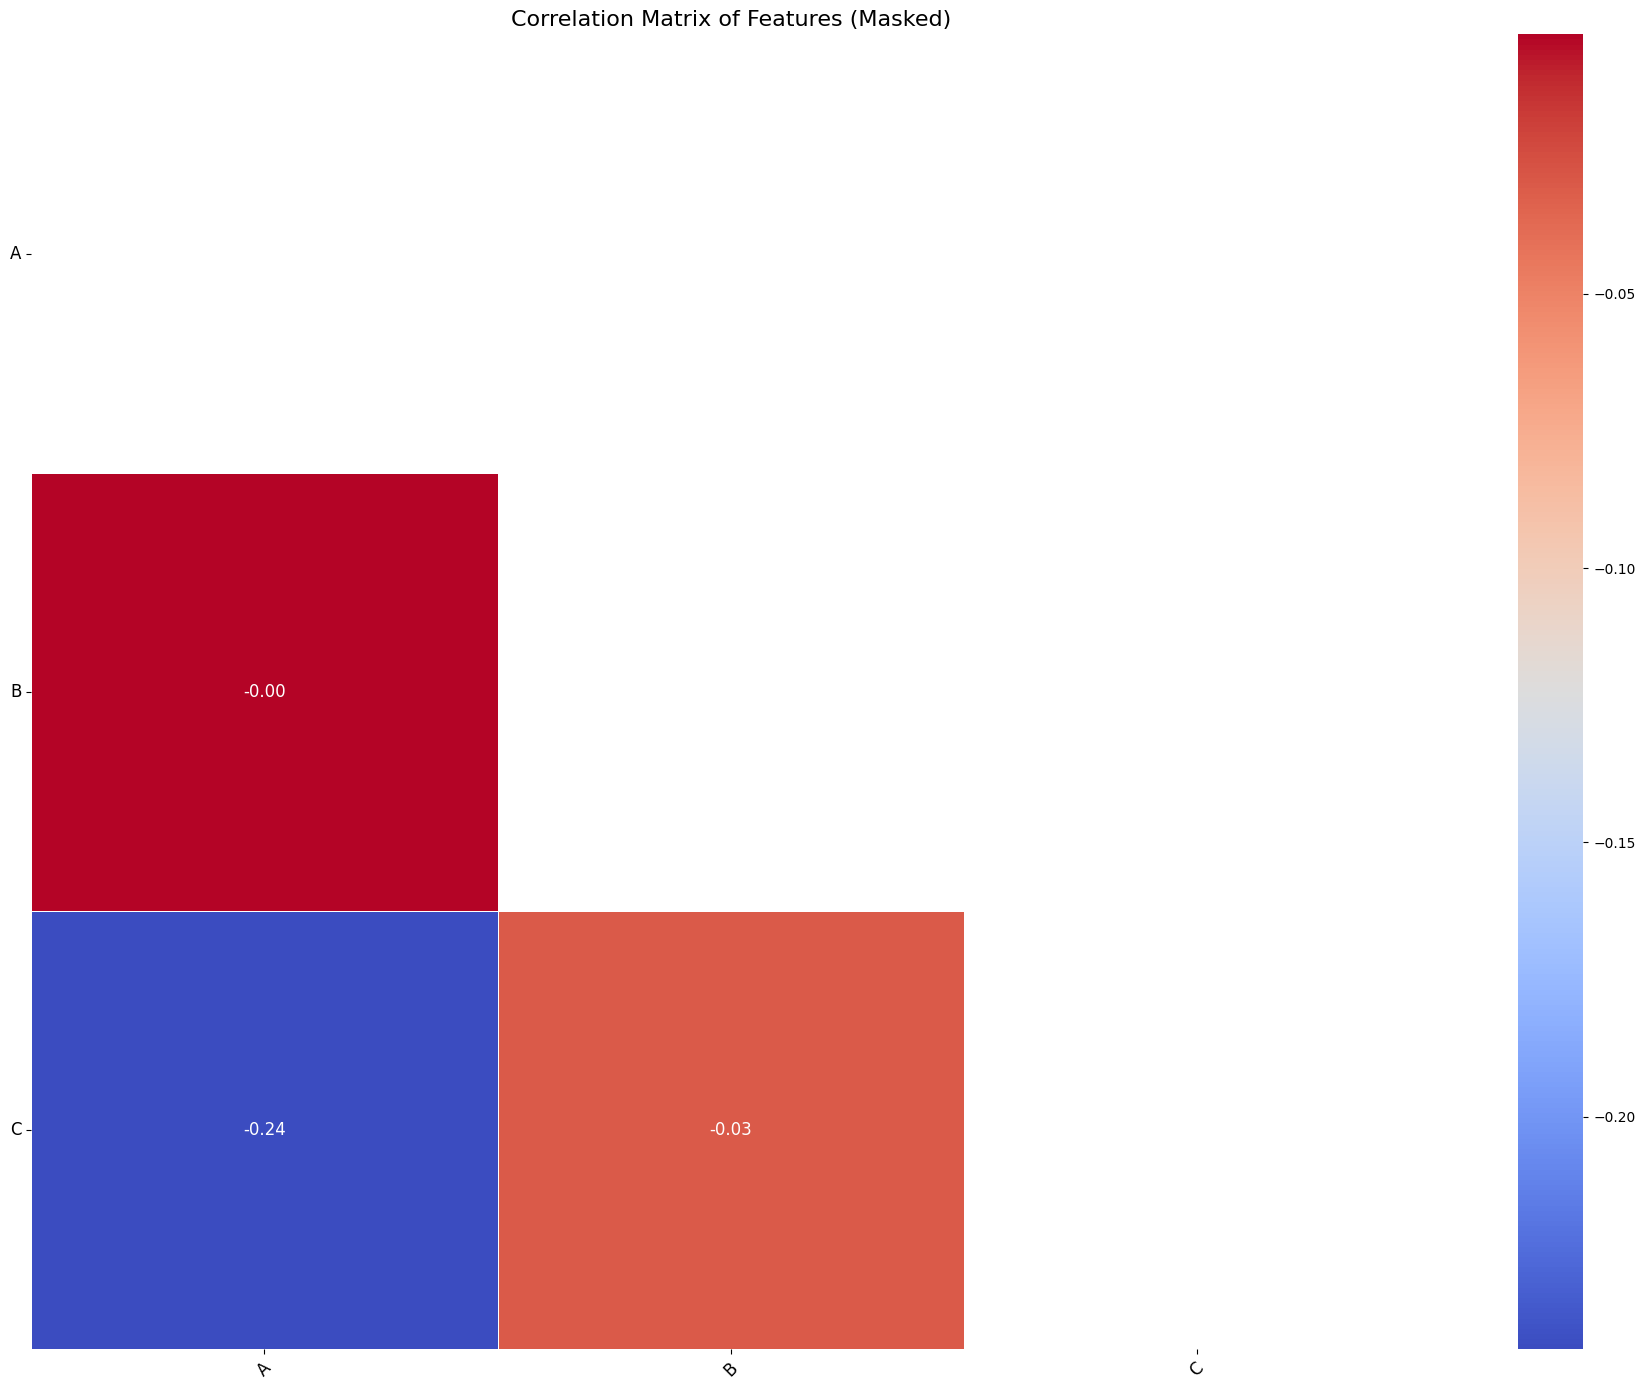

In [23]:
import numpy as np


# Mask the upper triangle to remove redundant values (correlation is symmetric)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

corr_matrix = data.corr()

# Create the heatmap with the mask applied
plt.figure(figsize=(18, 14))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12}, mask=mask, cbar=True)

# Title and labels
plt.title('Correlation Matrix of Features (Masked)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x labels for better readability
plt.yticks(fontsize=12, rotation=0)   # Keep y labels horizontal
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [10]:
# Check if there are any missing values in the target variable 'y'
print("Missing values in the target variable (y):")
print(y.isna().sum())


Missing values in the target variable (y):
1


In [11]:
# Drop rows where target variable 'y' contains NaN values
data = data.dropna(subset=['Class'])

# Reassign 'X' and 'y' after dropping rows with NaN target values
X = data.drop(columns='Class')  # Features
y = data['Class']  # Target


In [12]:
# Check if there are any missing values in the feature set 'X' and target 'y'
print("\nMissing values in features (X):")
print(X.isna().sum())

print("\nMissing values in target (y):")
print(y.isna().sum())



Missing values in features (X):
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Missing values in target (y):
0


In [13]:
# Check for missing values in the target variable 'y'
print("Missing values in target (y):")
print(y.isna().sum())

# Drop rows where the target variable ('y') contains NaN values
data = data.dropna(subset=['Class'])

# Reassign 'X' and 'y' after dropping rows with NaN target values
X = data.drop(columns='Class')  # Features
y = data['Class']  # Target

# Check again for missing values in 'X' and 'y'
print("\nMissing values in features (X):")
print(X.isna().sum())

print("\nMissing values in target (y):")
print(y.isna().sum())

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the train and test sets
print("\nShapes of the train and test sets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Missing values in target (y):
0

Missing values in features (X):
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

Missing values in target (y):
0

Shapes of the train and test sets:
X_train shape: (20858, 30)
y_train shape: (20858,)
X_test shape: (8940, 30)
y_test shape: (8940,)


In [14]:
# Train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', class_weight='balanced', gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = svm_model.predict(X_test)


In [15]:
# Classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68      8912
         1.0       0.01      0.82      0.01        28

    accuracy                           0.52      8940
   macro avg       0.50      0.67      0.35      8940
weighted avg       1.00      0.52      0.68      8940



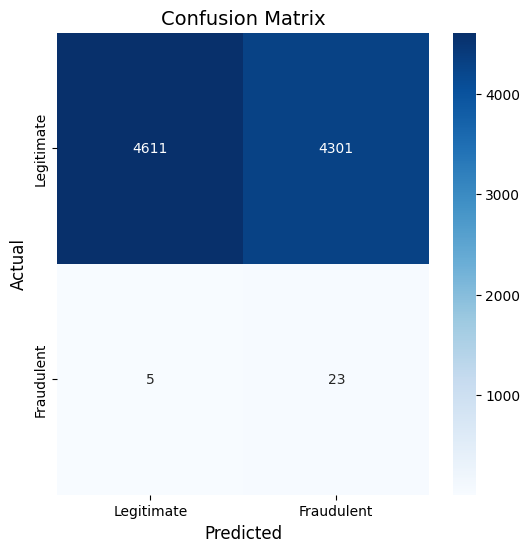

In [16]:
# Confusion Matrix visualization (after model training)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


In [17]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))
print(f"\nROC-AUC Score: {roc_auc:.2f}")



ROC-AUC Score: 0.67


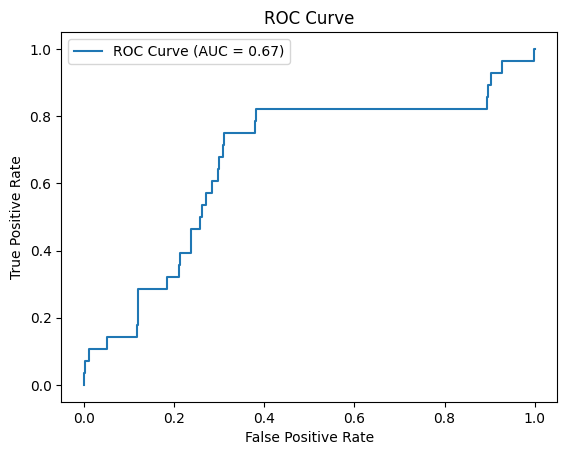

In [18]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
